In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [74]:
file = "google_play_full.csv"


In [75]:
data = pd.read_csv(file, encoding='UTF-8')

In [76]:
data.shape

(267052, 13)

# Data Cleansing Step

In [77]:
data_valid_installs = data.loc[data.Installs.apply(lambda x: "+" in x)]

In [78]:
data_valid_installs.Installs.value_counts()

10,000+           60531
1,000+            48880
100,000+          37498
5,000+            26360
50,000+           22795
100+              18502
500+              13919
1,000,000+        12853
500,000+           9846
10+                4427
50+                3871
10,000,000+        2821
5,000,000+         2804
5+                  671
1+                  445
50,000,000+         414
100,000,000+        283
0+                   52
500,000,000+         35
1,000,000,000+       24
5,000,000,000+        3
Name: Installs, dtype: int64

In [79]:
data_valid_installs.dtypes

App                 object
Category            object
Rating              object
Reviews             object
Installs            object
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 11         object
Unnamed: 12        float64
dtype: object

In [80]:
data_valid_installs.Rating = data_valid_installs.Rating.astype(float)

In [81]:
data_valid_installs.Reviews = data_valid_installs.Reviews.astype(float)

In [82]:
data_valid_installs.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Installs            object
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 11         object
Unnamed: 12        float64
dtype: object

In [83]:
#Drop Unnamed columns of NaNs
del data_valid_installs["Unnamed: 11"]
del data_valid_installs["Unnamed: 12"]

In [96]:
data_valid_installs.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Installs             object
Size                 object
Price                object
Content Rating       object
Last Updated         object
Minimum Version      object
Latest Version       object
Installs_Numeric    float64
GROUPED_CATEGORY     object
dtype: object

In [85]:
data_valid_installs.Price.value_counts()

0           255428
$0.99         2317
$1.99         1552
$2.99         1351
$4.99          883
$3.99          767
$1.49          761
$2.49          518
$3.49          339
$9.99          275
$4.49          255
$5.99          224
$7.99          173
$6.99          171
$5.49          150
$8.99           84
$14.99          70
$6.49           68
$7.49           67
$19.99          55
$12.99          51
$10.99          50
$9.49           49
$1.00           48
$11.99          47
$24.99          45
$2.00           41
$29.99          39
$8.49           35
$15.99          31
             ...  
$2.98            1
$5.30            1
$19.50           1
$1.52            1
$4.06            1
$100.00          1
$3.77            1
$3.58            1
$7.68            1
$3.09            1
$45.99           1
$4.14            1
$2.82            1
$2.54            1
$4.53            1
$99.99           1
$4.03            1
$3.84            1
$8.92            1
$12.62           1
$1.53            1
$13.61      

In [86]:
#Create new column of Installs that have +'s and ,'s removed and converted into floats.
data_valid_installs["Installs_Numeric"] = data_valid_installs.Installs.apply(lambda x: float(x.replace("+", "").replace(",", "")))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
data_valid_installs.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Installs             object
Size                 object
Price                object
Content Rating       object
Last Updated         object
Minimum Version      object
Latest Version       object
Installs_Numeric    float64
dtype: object

In [88]:
data_valid_installs.head()

,App,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Installs_Numeric
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,5000000.0
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,100000000.0
2,Peapod,SHOPPING,3.656329,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0,100000.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2,10000000.0
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device,10000.0


In [89]:
def gameMapper(inCategory):
    if "GAME" in inCategory:
        return "GAME"
    else:
        return inCategory

data_valid_installs["GROUPED_CATEGORY"] = data_valid_installs.Category.apply(lambda x: gameMapper(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


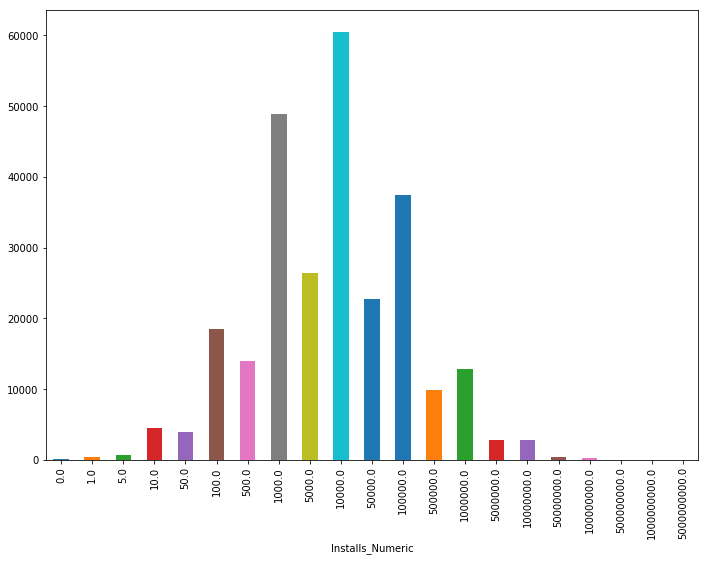

In [90]:
data_valid_installs.groupby("Installs_Numeric").count()["App"].plot(kind="bar")
plt.savefig('Installs_App_Count.png')

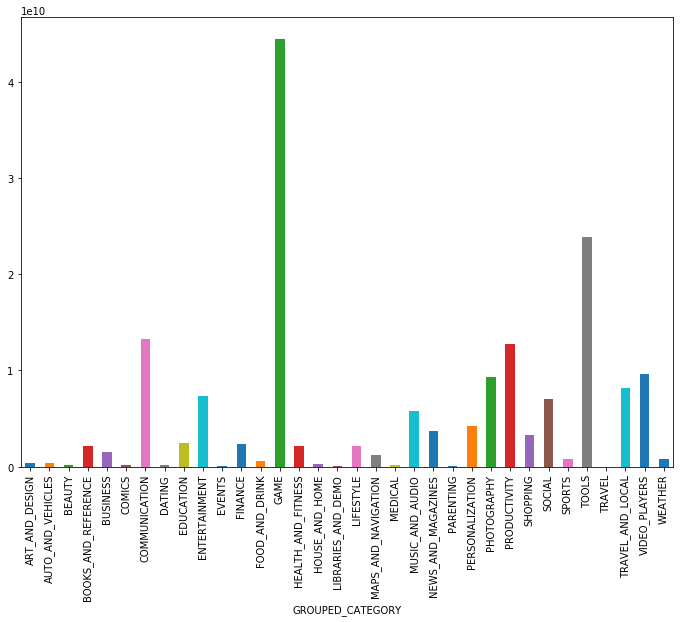

In [91]:
data_valid_installs.groupby("GROUPED_CATEGORY").sum()["Installs_Numeric"].plot(kind="bar")
plt.savefig('Category_Installs.png')

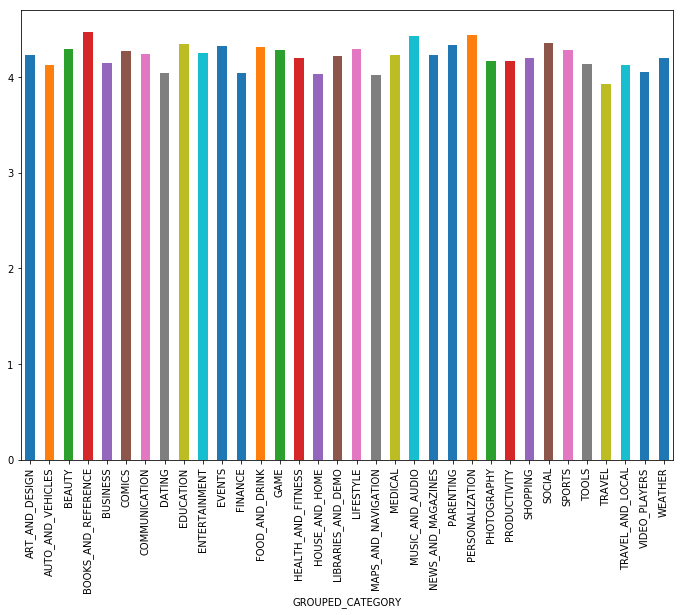

In [92]:
data_valid_installs.groupby("GROUPED_CATEGORY").mean()["Rating"].plot(kind="bar")
plt.savefig('Category_Rating.png')

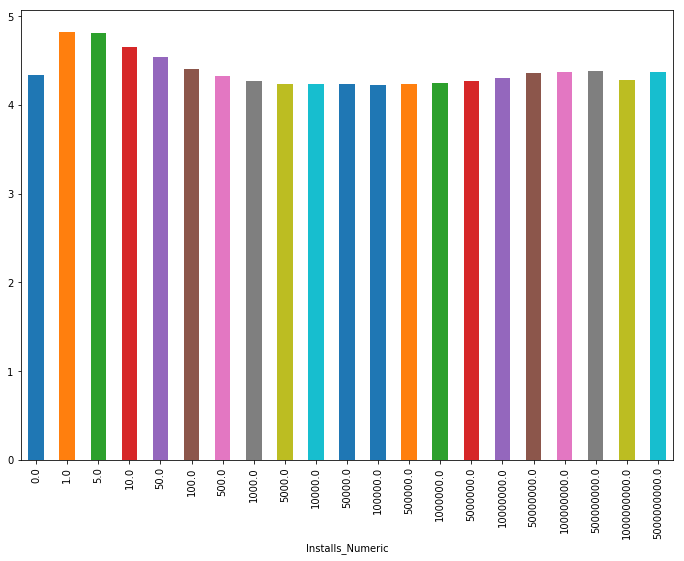

In [93]:
data_valid_installs.groupby("Installs_Numeric").mean()["Rating"].plot(kind="bar")
plt.savefig('Installs_Rating.png')

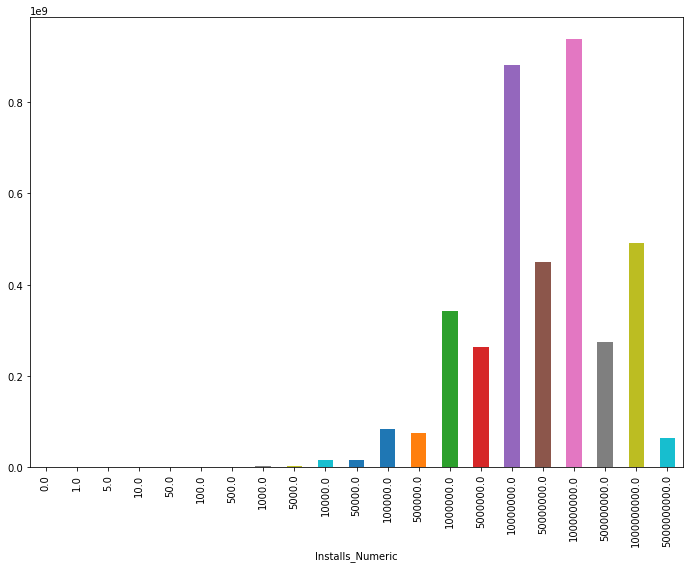

In [94]:
data_valid_installs.groupby("Installs_Numeric").sum()["Reviews"].plot(kind="bar")
plt.savefig('Installs_Reviews.png')

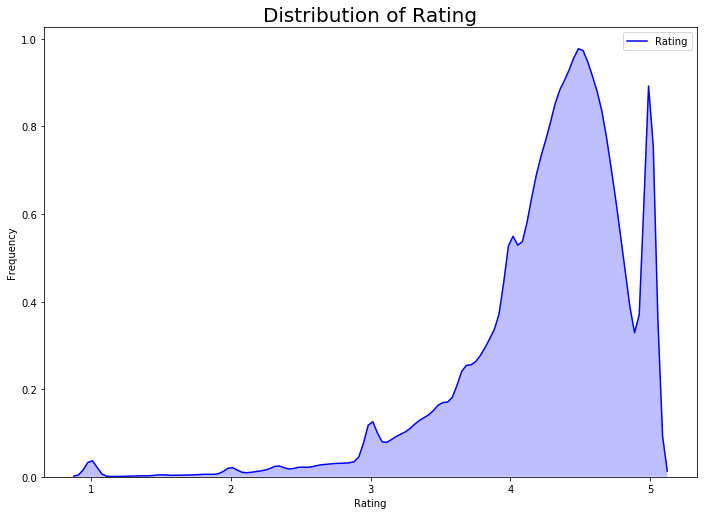

In [107]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_valid_installs.Rating, color="blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.savefig('Dist_Rating.png')

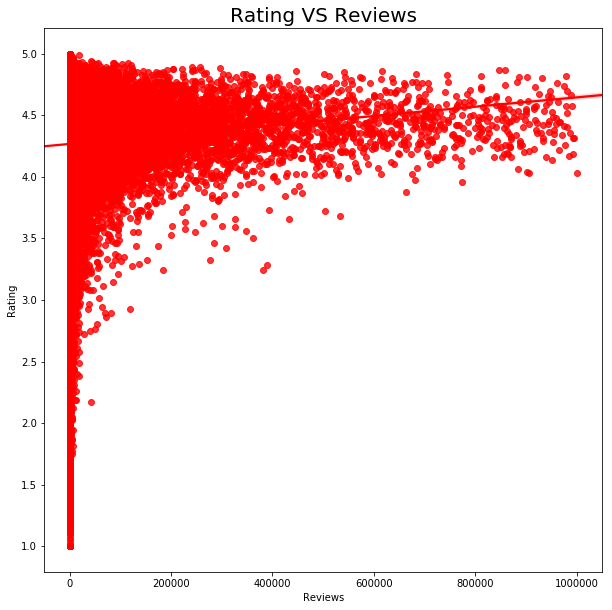

In [102]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data_valid_installs[data_valid_installs['Reviews']<1000000]);
plt.title('Rating VS Reviews',size = 20)
plt.savefig('Ratings_vs_Reviews.png')